In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3247,ham,Also track down any lighters you can find,NaN,NaN,NaN
2558,ham,"Some friends want me to drive em someplace, pr...",NaN,NaN,NaN
3536,ham,Mmmmm ... It was sooooo good to wake to your w...,NaN,NaN,NaN
742,ham,Just got up. have to be out of the room very s...,NaN,NaN,NaN
1262,spam,"Hungry gay guys feeling hungry and up 4 it, no...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

###  1. Data cleaning
###  2. EDA
###  3. Preprocessing
### 4. Model Building
###  5. Evaluation
###  6. Deployement

In [5]:
#1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# we have 3 columns where mod=st of the data is missing

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# renaming the columns

In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
# label encoding the target column

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(403)

In [19]:
df = df.drop_duplicates(keep='first')


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5169, 2)

In [22]:
# 2. EDA

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

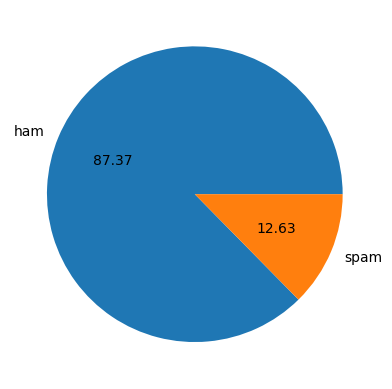

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# Data is imbalanced

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ANKITA
[nltk_data]     UPADHAYAY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_character']=df['text'].apply(len) # return length of text

C:\Users\ANKITA UPADHAYAY\AppData\Local\Temp\ipykernel_27404\1942845368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character']=df['text'].apply(len) # return length of text


In [29]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [30]:
# fetching no of words

In [31]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ANKITA UPADHAYAY\AppData\Local\Temp\ipykernel_27404\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [32]:
df

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [33]:
# no of sentences

In [34]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ANKITA UPADHAYAY\AppData\Local\Temp\ipykernel_27404\754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [35]:
df

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [36]:
df[['num_character', 'num_words', 'num_sentences']].describe()


,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target'] ==0][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target'] == 1][['num_character', 'num_words', 'num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns


<Axes: xlabel='num_character', ylabel='Count'>

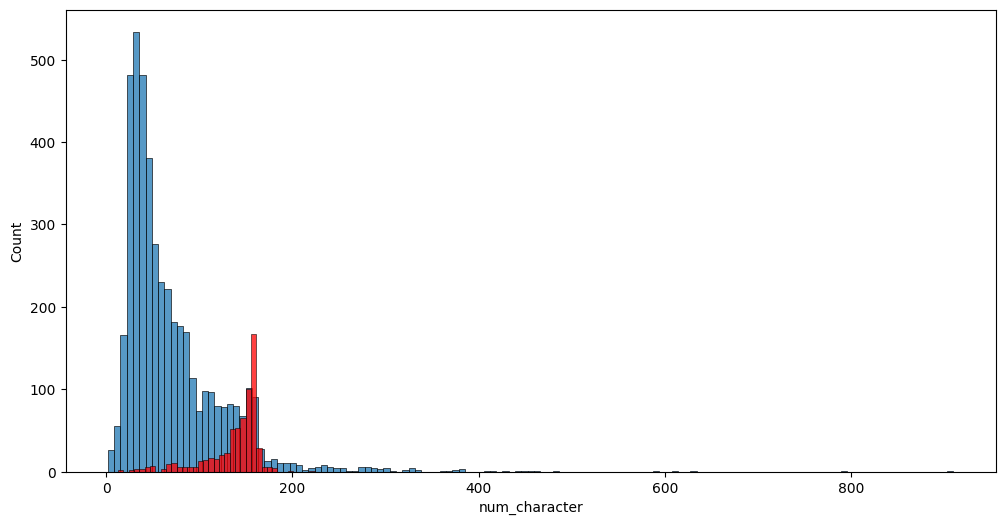

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

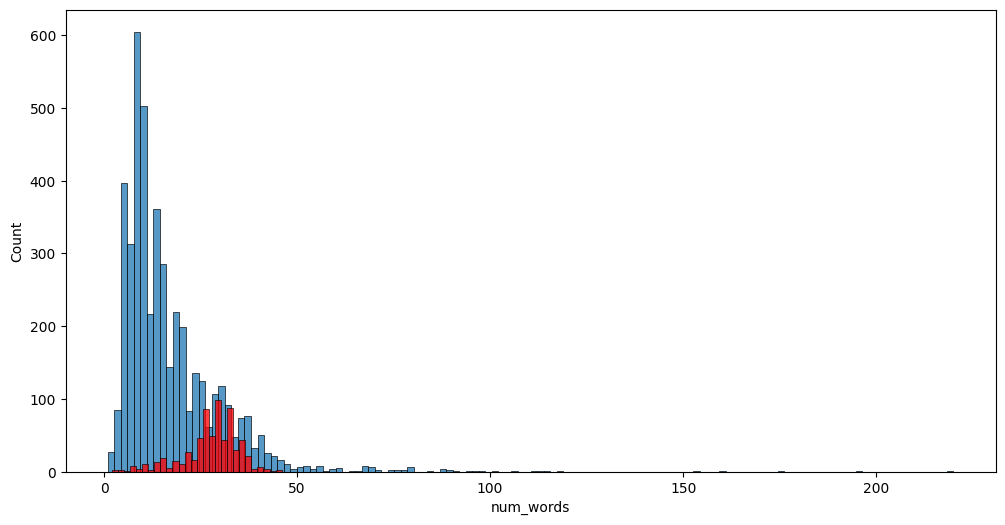

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

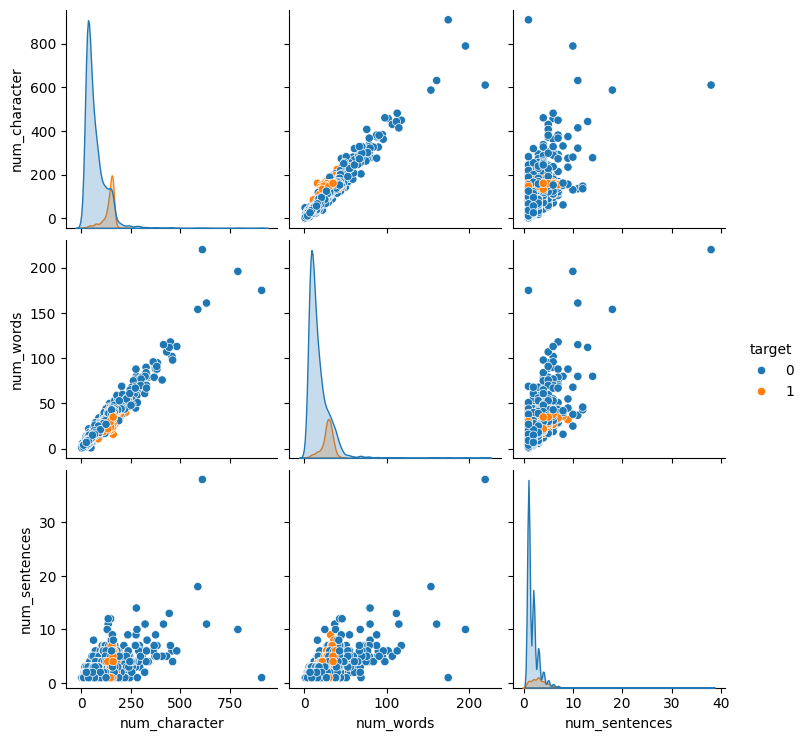

In [42]:
sns.pairplot(df,hue='target')

In [43]:
# we have a outliers in our data

<Axes: >

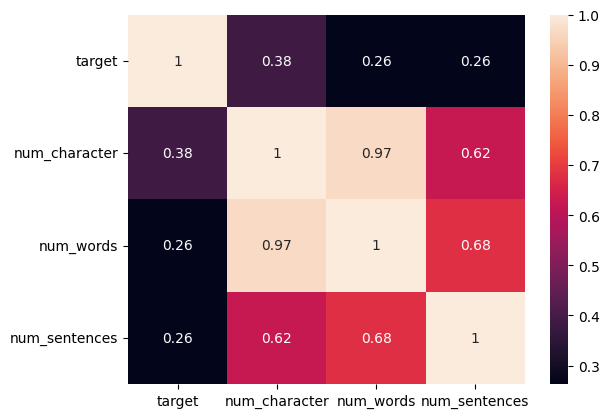

In [44]:
df_numeric = df.select_dtypes(include=[float, int])  # Only numeric columns
sns.heatmap(df_numeric.corr(), annot=True)


# 3. Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters - is ,of the
4. Removing stop words and punctuations
5. Stemming - dance, dancing, danced= dance

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
result = ps.stem('loveing')
print(result)


love


In [48]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)# removing special character

    text=y[:]
    y.clear()
    for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [49]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough")

'gon na home soon want talk stuff anymor tonight k cri enough'

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\ANKITA UPADHAYAY\AppData\Local\Temp\ipykernel_27404\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [51]:
df

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [52]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

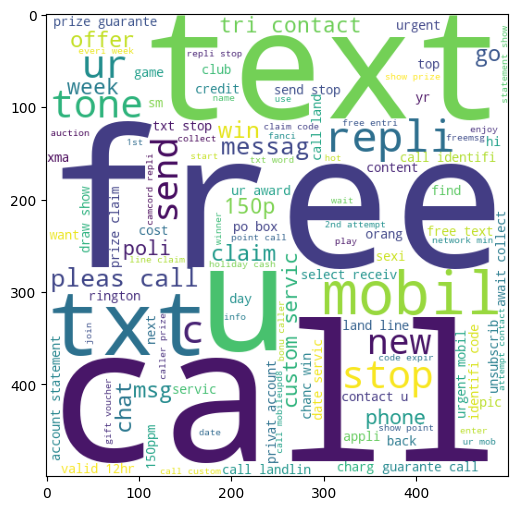

In [54]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [55]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

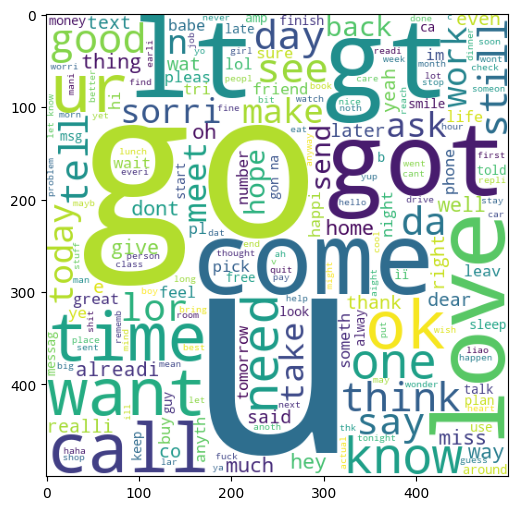

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [57]:
# TOP 30 WORDS IN SPAM AND HAM

In [58]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

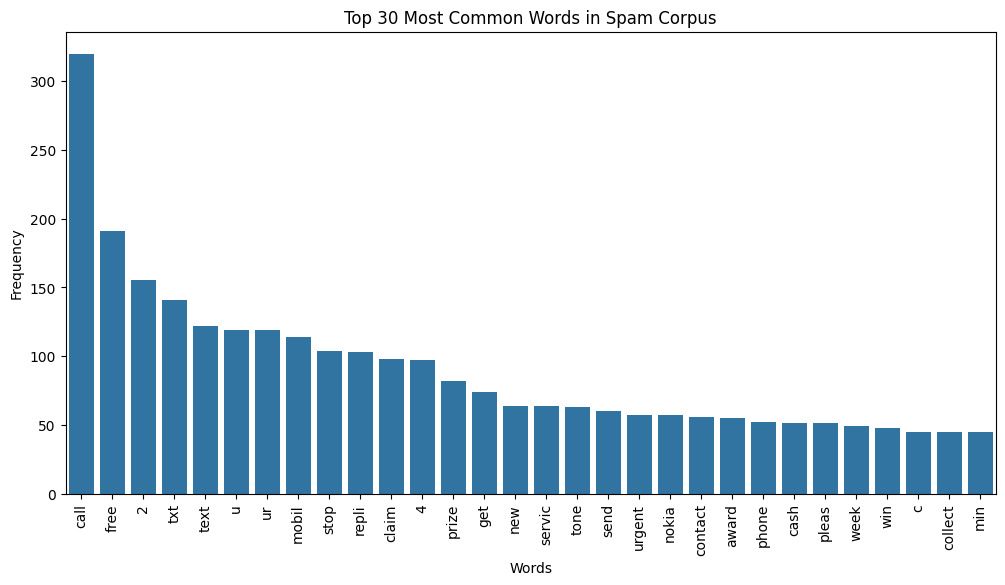

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming spam_corpus is a list of words
spam_counts = Counter(spam_corpus).most_common(30)  
df_spam = pd.DataFrame(spam_counts, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_spam['Word'], y=df_spam['Frequency'])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()


In [61]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

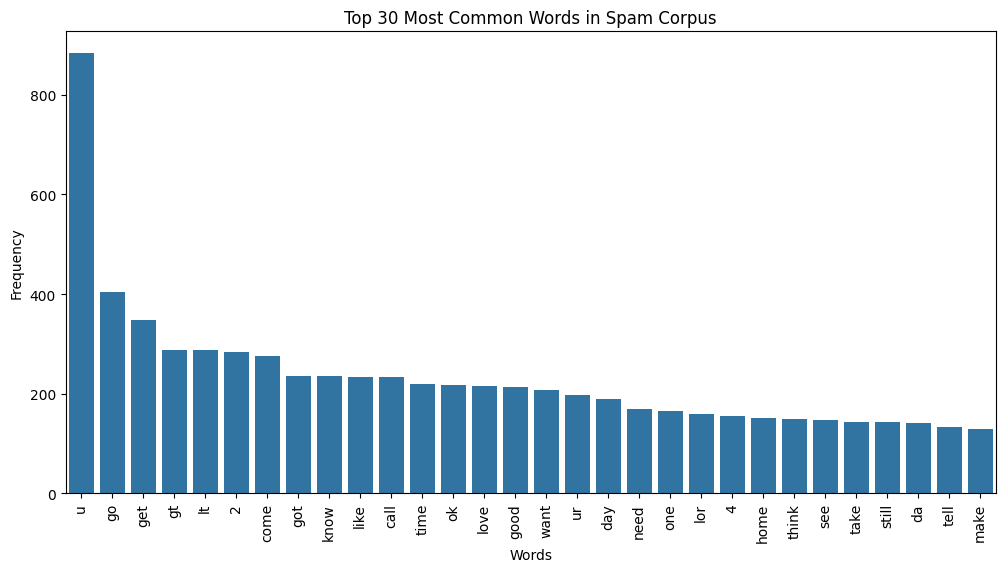

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming spam_corpus is a list of words
ham_counts = Counter(ham_corpus).most_common(30)  
df_ham = pd.DataFrame(ham_counts, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_ham['Word'], y=df_ham['Frequency'])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()


# model building

# converting text to vectors 
1. bag of words
2. tfdif
3. word to bag

In [254]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tfidf =TfidfVectorizer(max_features=3000)

In [255]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [212]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [217]:
# import numpy as np
#appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [256]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [220]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [257]:
X.shape

(5169, 3000)

In [258]:
y = df['target'].values

In [259]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_train,X_test,Y_train,Y_test =train_test_split(X,y,test_size = 0.2,random_state= 2 )

In [262]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [263]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [264]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [265]:
# multinomialNB
mnb.fit(X_train,Y_train)
Y_pred1=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [266]:
# bernoulliNB
bnb.fit(X_train,Y_train)
Y_pred1=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [126]:
# Tfidf

In [127]:

# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [128]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [129]:
y = df['target'].values


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,Y_train,Y_test =train_test_split(X,y,test_size = 0.2,random_state= 2 )

In [132]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [133]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [134]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [135]:
# multinomialNB
mnb.fit(X_train,Y_train)
Y_pred1=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [136]:
# bernoulliNB
bnb.fit(X_train,Y_train)
Y_pred1=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [137]:
# tfidf ---> mnb

In [267]:
from sklearn.svm import SVC  # Support Vector Classifier (SVC)
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import MultinomialNB   # Multinomial Naive Bayes (MNB)
from sklearn.tree import DecisionTreeClassifier   # Decision Tree Classifier (DTC)
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier (LRC)
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier (RFC)
from sklearn.ensemble import AdaBoostClassifier   # AdaBoost Classifier (ABC)
from sklearn.ensemble import BaggingClassifier   # Bagging Classifier (BC)
from sklearn.ensemble import ExtraTreesClassifier  # Extra Trees Classifier (ETC)
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier (GBST)
from xgboost import XGBClassifier  # XGBoost Classifier (XGB)

In [268]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [269]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DTC": dtc,
    "LRC": lrc,
    "RFC": rfc,
    "ABC": abc,
    "BC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "XGB": xgb
}



In [270]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    return accuracy,precision

In [271]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [235]:
accuracy_scores = []
precision_scores = []
for name , clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For KN
Accuracy -  0.9061895551257253
Precision -  1.0
For MNB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For DTC
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For LRC
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For RFC
Accuracy -  0.971953578336557
Precision -  1.0


C:\Users\ANKITA UPADHAYAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For ABC
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For BC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For XGB
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [272]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [273]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RFC,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LRC,0.970986,0.973684
10,XGB,0.973888,0.966387
6,ABC,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DTC,0.924565,0.916667
7,BC,0.962282,0.915966
2,NB,0.964217,0.834437


In [274]:
performance_df1=pd.melt(performance_df,id_vars= "Algorithm")

In [275]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RFC,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LRC,Accuracy,0.970986
4,XGB,Accuracy,0.973888
5,ABC,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DTC,Accuracy,0.924565
8,BC,Accuracy,0.962282
9,NB,Accuracy,0.964217


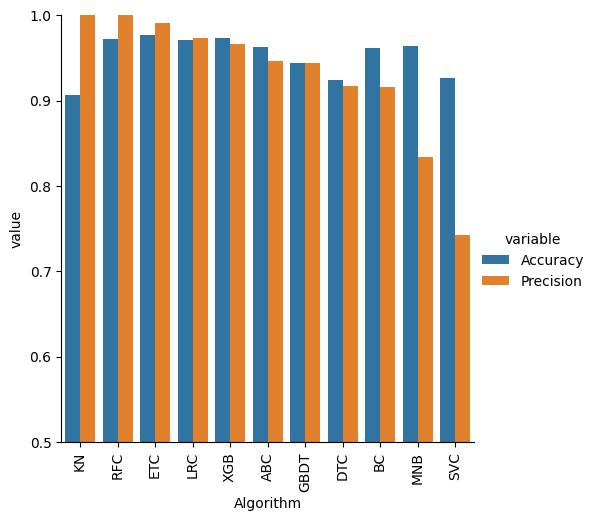

In [240]:
sns.catplot(x= 'Algorithm',y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [241]:
#model improve
# 1. change the max_features parameter of TfIdf

In [297]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [298]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [293]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [299]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [295]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [300]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RFC,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LRC,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
4,XGB,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,ABC,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,DTC,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667
8,BC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


In [301]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.906190,1.000000,0.906190,1.000000
1,RFC,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379
3,LRC,0.970986,0.973684,0.970986,0.973684
4,XGB,0.973888,0.966387,0.973888,0.966387
5,ABC,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444
7,DTC,0.924565,0.916667,0.924565,0.916667
8,BC,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437


In [302]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [303]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [306]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [310]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [311]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [312]:
from sklearn.ensemble import StackingClassifier

In [313]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [316]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [317]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))